In [2]:
import numpy as np
import cvxpy as cp
import networkx as nx

from numpy.random import default_rng
from opt_utils import decompose_psd, hyperplane_rounding, complex_hyperplane_rounding, fixed_point_iteration, normalize_rows, load_graph

# Max-cut

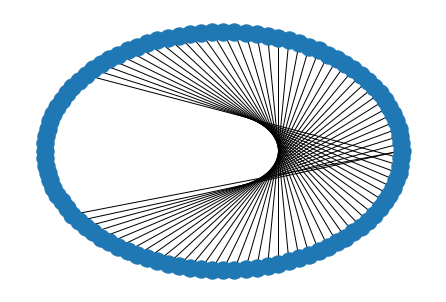

In [2]:
graph_file = "G48.mtx"
graph_type = 1

# graph_file = "toruspm3-8-50.dat"
# graph_type = 0

n = 100
G = load_graph(graph_file, graph_type, n)

In [3]:
L = nx.laplacian_matrix(G).toarray() * 1.0

<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [4]:
# x = cp.Variable(n)
# constraints = [ cp.square(x[i]) == 1 for i in range(n) ]
# prob = cp.Problem(cp.Minimize(cp.norm(x - x_0.T[0])), constraints)
# prob.solve()

In [5]:
X = cp.Variable((n,n), PSD=True)
constraints = [ X[i][i] == 1 for i in range(n) ]
prob = cp.Problem(cp.Maximize(1/4 * (cp.trace(L @ X))), constraints)
prob.solve()

138.9999999971585

In [7]:
np.linalg.eigvalsh(X.value)

array([-1.21202339e-10, -1.20800263e-10, -1.20534684e-10, -1.20303641e-10,
       -1.20194076e-10, -1.20047302e-10, -1.19813644e-10, -1.19681649e-10,
       -1.19343083e-10, -1.19171086e-10, -1.18756526e-10, -1.18557847e-10,
       -1.18120849e-10, -1.17839973e-10, -1.16974607e-10, -1.16634032e-10,
       -1.16159203e-10, -1.14006032e-10, -1.13910604e-10, -1.13374564e-10,
       -1.10047581e-10, -1.08540058e-10, -1.07806709e-10, -1.06474986e-10,
       -9.94296086e-11, -9.87505810e-11, -9.23781843e-11, -7.88191738e-11,
       -7.74235295e-11, -7.56665151e-11, -5.90262773e-11, -3.20050860e-11,
        3.03285715e-11,  4.22599070e-11,  1.06281790e-10,  2.15357472e-10,
        2.79251246e-10,  3.52591469e-10,  4.60127740e-10,  7.43207550e-10,
        1.14260024e-09,  2.12899037e-09,  2.24572713e-09,  3.39452300e-09,
        8.53279246e-09,  1.87194396e-08,  2.93692954e-08,  6.73876352e+00,
        1.77608735e+01,  2.55003629e+01])

In [8]:
_, x_0 = hyperplane_rounding(decompose_psd(X.value), lambda Y : -1/4 * np.trace(Y @ Y.T @ L))

In [9]:
# if x_0[0] < 0:
#     x_0 = -x_0
#
# # find X in the elliptope whose first column should be the same as x_0, due to the objective function
# X_close = cp.Variable((n,n), PSD=True)
# constraints = [ X_close[i][i] == 1 for i in range(n) ]
# prob = cp.Problem(cp.Maximize(cp.sum([x_0[i] * X_close[i][0] for i in range(n)])), constraints)
# prob.solve(solver=cp.MOSEK)
#
# print(np.linalg.eigvalsh(X_close.value))
# print(1/4 * np.trace(X_close.value @ L))

In [10]:
# fixed_point_iteration(prob, X, np.zeros((n,n)), False)

In [11]:
fixed_point_iteration(prob, X, np.eye(n), False)

initial objective: 2926652.604548
initial eigenvalues:
[-1.21202339e-10 -1.20800263e-10 -1.20534684e-10 -1.20303641e-10
 -1.20194076e-10 -1.20047302e-10 -1.19813644e-10 -1.19681649e-10
 -1.19343083e-10 -1.19171086e-10 -1.18756526e-10 -1.18557847e-10
 -1.18120849e-10 -1.17839973e-10 -1.16974607e-10 -1.16634032e-10
 -1.16159203e-10 -1.14006032e-10 -1.13910604e-10 -1.13374564e-10
 -1.10047581e-10 -1.08540058e-10 -1.07806709e-10 -1.06474986e-10
 -9.94296086e-11 -9.87505810e-11 -9.23781843e-11 -7.88191738e-11
 -7.74235295e-11 -7.56665151e-11 -5.90262773e-11 -3.20050860e-11
  3.03285715e-11  4.22599070e-11  1.06281790e-10  2.15357472e-10
  2.79251246e-10  3.52591469e-10  4.60127740e-10  7.43207550e-10
  1.14260024e-09  2.12899037e-09  2.24572713e-09  3.39452300e-09
  8.53279246e-09  1.87194396e-08  2.93692954e-08  6.73876352e+00
  1.77608735e+01  2.55003629e+01]
current objective: 2816812.796081
current objective: 2663636.999059
fixed point objective: 2663637.000000
fixed point eigenvalues:


# PhaseCut (maximize)

In [ ]:
n = 50  # number of observations
p = 20  # dimension of x
max_val = 10

In [ ]:
rng = default_rng()
A = rng.random((n,p)) * max_val + rng.random((n,p)) * max_val * 1j
assert np.linalg.matrix_rank(A, tol=1e-9) >= p  # A must be injective; if the rows of A are linearly independent, AA+ = I
b = rng.random(n) * max_val
M = np.diag(b) @ (np.identity(n) - A @ np.linalg.pinv(A)) @ np.diag(b)

In [ ]:
U = cp.Variable((n,n), hermitian=True)

### Unit modulus

In [ ]:
constraints = [U >> 0]
constraints += [U[i][i] == 1 for i in range(n)]

prob = cp.Problem(cp.Maximize(cp.real(cp.trace(M @ U))), constraints)
prob.solve()

In [ ]:
complex_hyperplane_rounding(decompose_psd(U.value), lambda u : -np.real(u.conj().T @ M @ u))

In [ ]:
fixed_point_iteration(prob, U, -np.zeros((n,n)), True)

### Relaxed bounds

In [ ]:
delta = 0.05

In [ ]:
constraints = [U >> 0]
constraints += [cp.real(U[i][i]) >= 1 - delta for i in range(n)]
constraints += [cp.real(U[i][i]) <= 1 + delta  for i in range(n)]

prob = cp.Problem(cp.Maximize(cp.real(cp.trace(M @ U))), constraints)
prob.solve()

In [ ]:
complex_hyperplane_rounding(decompose_psd(U.value), lambda u : -np.real(u.conj().T @ M @ u), 1 - delta, 1 + delta)

In [ ]:
# fixed_point_iteration(prob, U, np.zeros((n,n)), True)
fixed_point_iteration(prob, U, -np.eye(n), True)